In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
k_vals = [0.1, 0.01, 0.001]

data = []
for k in k_vals:
    data.append(np.loadtxt(f"../data/perturbations_k{k}.txt"))
data = np.array(data)

In [83]:
data.shape

(3, 5000, 9)

In [84]:
x          = data[0,:,0]
delta_cdm  = data[:,:,1]
delta_b    = data[:,:,2]
v_cdm      = data[:,:,3]
v_b        = data[:,:,4]
Theta0     = data[:,:,5]
Theta1     = data[:,:,6]
Theta2     = data[:,:,7]
Phi        = data[:,:,8]
x.shape

(5000,)

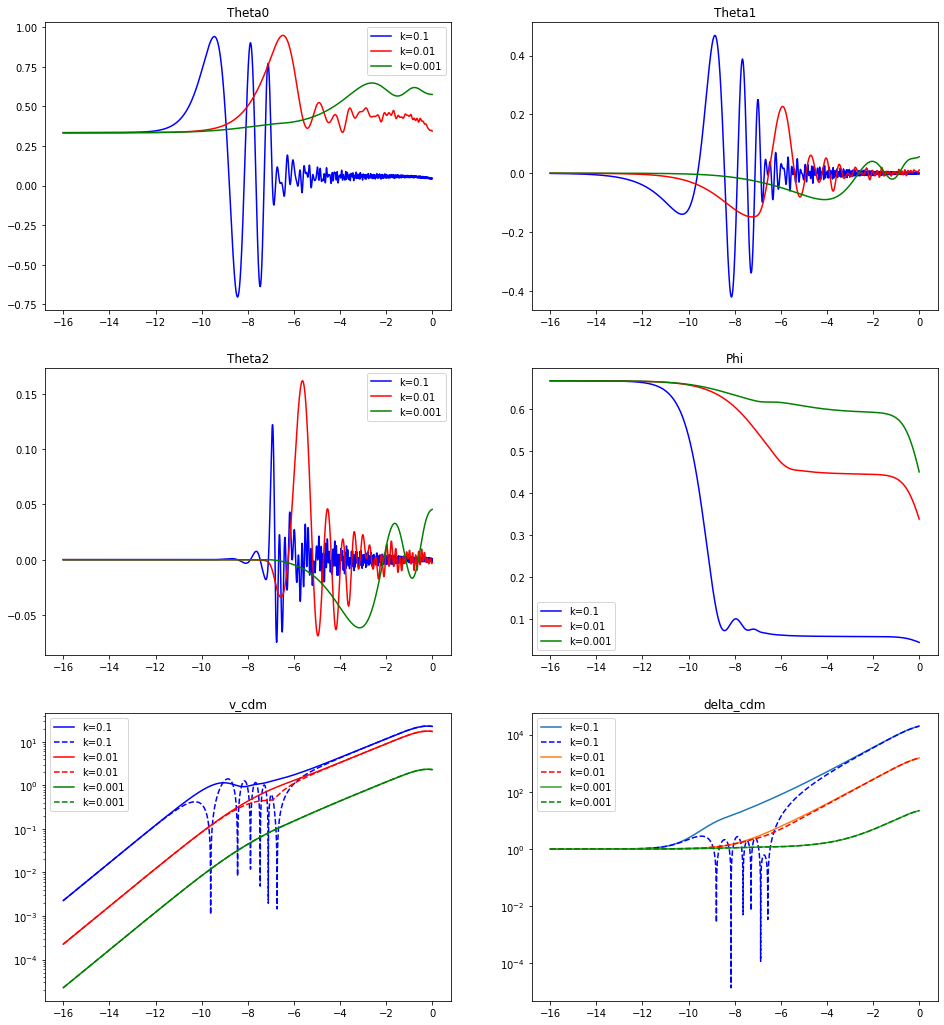

In [85]:
colors = ["b", "r", "g"]

fig, ax = plt.subplots(3, 2, figsize=(16,18))
for i, k in enumerate(k_vals):
    ax[0,0].plot(x, Theta0[i], c=colors[i], label=f"k={k}")
    ax[0,0].set_title("Theta0")

    ax[0,1].plot(x, Theta1[i], c=colors[i], label=f"k={k}")
    ax[0,1].set_title("Theta1")

    ax[1,0].plot(x, Theta2[i], c=colors[i], label=f"k={k}")
    ax[1,0].set_title("Theta2")

    ax[2,1].semilogy(x, np.abs(delta_cdm[i]), label=f"k={k}")
    ax[2,1].semilogy(x, np.abs(delta_b[i]), c=colors[i], ls="--", label=f"k={k}")
    ax[2,1].set_title("delta_cdm")
    
    ax[2,0].semilogy(x, np.abs(v_cdm[i]), c=colors[i], label=f"k={k}")
    ax[2,0].semilogy(x, np.abs(v_b[i]), c=colors[i], ls="--", label=f"k={k}")
    ax[2,0].set_title("v_cdm")    
    
    ax[1,1].plot(x, Phi[i], c=colors[i], label=f"k={k}")
    ax[1,1].set_title("Phi")

ax[0,0].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[2,0].legend()
ax[2,1].legend()